In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from astropy.io import fits
from astropy.table import Table
import pcmdpy as ppy
import easydarkfigs
import pandas as pd
from collections import defaultdict
%matplotlib inline

In [2]:
import os
from glob import glob

In [3]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [4]:
counts = defaultdict(int)
for infile in glob(os.path.join('../data/NGC4993/raw/', 'j*_flc.fits')):
    filt = fits.getval(infile, 'FILTER1')
    if 'CLEAR' in filt:
        filt = fits.getval(infile, 'FILTER2')
    targ = fits.getval(infile, 'TARGNAME')
    counts[filt] += 1
    newname = f'../data/NGC4993/raw/NGC4993_{filt:s}_EXP{counts[filt]:d}_flc.fits'
    if os.path.isfile(newname):
        raise FileExistsError(f'{newname} exists')
    os.rename(infile, newname)

In [5]:
files = {'F475W': ['../data/NGC4993/raw/NGC4993_F475W_EXP{:d}_flc.fits'.format(i) for i in range(1, 4)],
         'F850LP': ['../data/NGC4993/raw/NGC4993_F850LP_EXP{:d}_flc.fits'.format(i) for i in range(1, 3)]}
outputs = {'F475W': '../data/NGC4993/reduced/NGC4993_F475W_drc.fits',
          'F850LP': '../data/NGC4993/reduced/NGC4993_F850LP_drc.fits'}
diff_im = '../data/NGC4993/reduced/NGC4993_g-z.fits'
darks = {}

# Alignment and Drizzling

In [6]:
os.environ['jref'] = '/Users/bcook/pCMDs/pixcmd/data/NGC4993/calibration/'

In [16]:
%%time
ppy.data.alignment.drizzle_many(files, outputs, reference_filter='F850LP', verbose=True, realign_kwargs={'threshold': 50, 'nclip': 3})

*******************************
Initial Alignment and Drizzling
--F850LP: Aligning
{'conv_width': 4.0, 'threshold': 200, 'shiftfile': False, 'updatehdr': True, 'writecat': False, 'clean': True, 'residplot': 'NoPlot', 'see2dplot': False, 'reusename': True, 'interactive': False, 'updatewcs': False, 'enforce_user_order': True, 'expand_refcat': True, 'wcsname': 'INITIAL_F850LP', 'refimage': ''}
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 12:59:09.622 (15/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F850LP_EXP1_flc.fits
    /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F850LP_EXP2_flc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/dat

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]



Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits['SCI',1]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.235891205665545e-06 1.1778426172511475e-05
CD_21  CD_22: 1.112624789920083e-05 -7.516696806457776e-06
CRVAL    : 197.4340513437057 -23.372873847347524
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049838819600178094
ORIENTAT : 122.5450000275577
WCSNAME  :  TWEAK_F850LP_1

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP1_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.284398668622766e-06 1.1442094341098796e-05
CD_21  CD_22: 1.0888248908918365e-05 -7.177067012650232e-06
CRVAL    : 197.4606083597245 -23.38835588106424
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04925829531041745
ORIENTAT : 122.09804068928446
WCSNAME  :  TWEAK

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi


....Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits...


Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits['SCI',1]



Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.236136358601226e-06 1.1778814557015747e-05
CD_21  CD_22: 1.1126616612982577e-05 -7.516917921768306e-06
CRVAL    : 197.43242335255937 -23.372092228814886
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049840411700105426
ORIENTAT : 122.54490759219796
WCSNAME  :  TWEAK_F850LP_1

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP2_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.284645792176608e-06 1.1442471364163139e-05
CD_21  CD_22: 1.088861005277493e-05 -7.177277876171728e-06
CRVAL    : 197.45898108746565 -23.387574717845254
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.04925986883806692
ORIENTAT : 122.09794860799386
WCSNAME  :  TWEAK_F850LP_1

....Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F47

Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pixel_shape" property which returns a list of NAXISj keyword values.
 [astropy.wcs.wcs]
Private attributes "_naxis1" and "_naxis2" have been deprecated since v3.1.
Instead use the "pi

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits[1]
WCS Keywords

CD_11  CD_12: 8.236605233890397e-06 1.1777475309640421e-05
CD_21  CD_22: 1.1125254162904525e-05 -7.517485132189549e-06
CRVAL    : 197.43324142405365 -23.37248272350864
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049837473593126444
ORIENTAT : 122.54982271493296
WCSNAME  :  TWEAK_F850LP_1

Processing /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits['SCI',2]

Updating header for /Users/bcook/pCMDs/pixcmd/data/NGC4993/raw/NGC4993_F475W_EXP3_flc.fits[4]
WCS Keywords

CD_11  CD_12: 8.285091531175805e-06 1.144118104959361e-05
CD_21  CD_22: 1.0887257364299003e-05 -7.1778364293149e-06
CRVAL    : 197.45979622468167 -23.38796639098895
CRPIX    : 2048.0 1024.0
NAXIS    : 4096 2048
Plate Scale : 0.049256964925741095
ORIENTAT : 122.10286441242847
WCSNAME  :  TWEAK_F850LP_1
--F475W: Redrizzling
    Drizzling Images with lanczos3 kernel to ../data/NGC4993/

In [14]:
from drizzlepac import tweakreg

Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 12:55:51.77 (15/03/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
numpy Version -> 1.15.1 
astropy Version -> 3.1.2 
stwcs Version -> 1.4.2 

Finding shifts for: 
    /Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F850LP_drc.fits
    /Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F475W_drc.fits

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F850LP_drc.fits':
  #  Source finding for '/Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F850LP_drc.fits', EXT=('SCI', 1) started at: 12:55:52.098 (15/03/2019)
     Found 3001 objects.
===  FINAL number of objects in image '/Users/bcook/pCMDs/pixcmd/data/NGC4993/reduced/NGC4993_F850LP_drc.fits': 3001

===  Source finding for image '/Users/bcook/pCMDs/pixcmd/dat

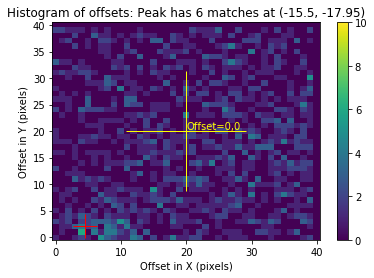

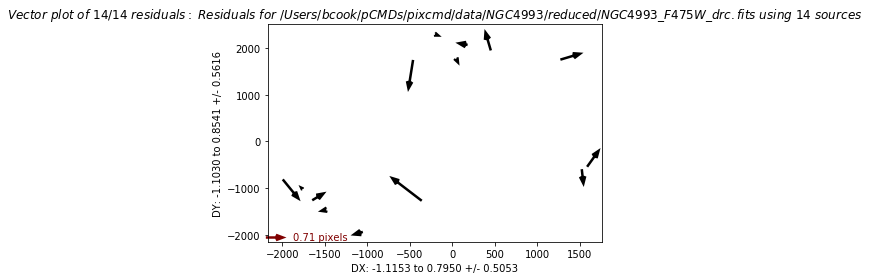

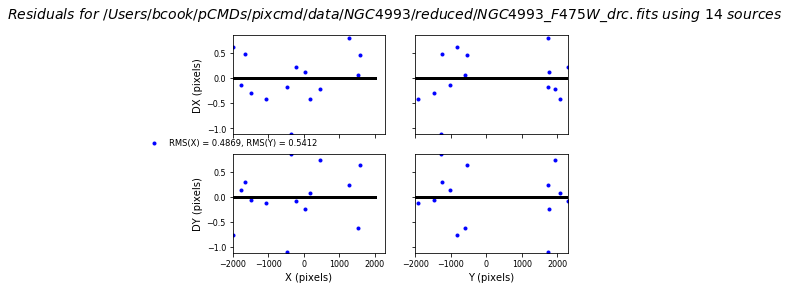

In [15]:
tweakreg.TweakReg([outputs['F850LP'], outputs['F475W']], conv_width=4.0, minobj=3,
                  threshold=50, nclip=3, shiftfile=False, writecat=False, clean=True,
                  interactive=False)

In [10]:
# Create difference image to check alignment
f1 = fits.open(outputs['F850LP'])
f2 = fits.open(outputs['F475W'])
data = f2['SCI'].data / f1['SCI'].data
hdulist = fits.HDUList([fits.PrimaryHDU(), fits.ImageHDU(data=data)])
hdulist.writeto(diff_im, overwrite=True)

In [9]:
f1 = fits.open(files['F850LP'][0])

In [12]:
f1['PRIMARY'].header['NPOLFILE']

'jref$02c14519j_npl.fits'

In [13]:
f1['SCI'].header['NPOLEXT']

'jref$02c14519j_npl.fits'

In [25]:
f = fits.open('../data/NGC4993/calibration/16r12191j_mdz.fits')

In [26]:
f.info()

Filename: ../data/NGC4993/calibration/16r12191j_mdz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   ()      
  1                1 BinTableHDU    282   452R x 65C   [26A, 1J, 1L, 21A, 21A, 8A, 1L, 1L, 12A, 1E, 1E, 1L, 25A, 37A, 25A, 37A, 1E, 8A, 1J, 21A, 1L, 21A, 1E, 1L, 1E, 8A, 1E, 1E, 1J, 1E, 1E, 1L, 1J, 1J, 8A, 1E, 1E, 1E, 1E, 1J, 1L, 1L, 8A, 12A, 1J, 1J, 1E, 1E, 1J, 1L, 1L, 1L, 12A, 12A, 1L, 1J, 1J, 8A, 1E, 1E, 1E, 1E, 1J, 12A, 1E]   


In [27]:
df = Table(f[1].data).to_pandas()

In [28]:
df.head()

,filter,numimages,mdriztab,refimage,runfile,coeffs,context,clean,group,ra,...,final_outnx,final_outny,final_kernel,final_scale,final_pixfrac,final_rot,final_fillval,final_bits,blot_interp,blot_sinscl
0,ANY,1,True,,,header,True,True,,NaN,...,-2147483647,-2147483647,square,NaN,1.0,NaN,NaN,65535,poly5,1.0
1,ANY,2,True,,,header,True,True,,NaN,...,-2147483647,-2147483647,square,NaN,1.0,NaN,NaN,336,poly5,1.0
2,ANY,4,True,,,header,True,True,,NaN,...,-2147483647,-2147483647,square,NaN,1.0,NaN,NaN,336,poly5,1.0
3,ANY,6,True,,,header,True,True,,NaN,...,-2147483647,-2147483647,square,NaN,0.8,NaN,NaN,336,poly5,1.0
4,"F892N,CLEAR2L",1,True,,,header,True,True,,NaN,...,-2147483647,-2147483647,square,NaN,1.0,NaN,NaN,65535,poly5,1.0


In [36]:
d1 = dict(df.iloc[1])
d2 = dict(df.iloc[2])
for k,v in d1.items():
    if d1[k] != d2[k]:
        print(k, d1[k], d2[k])

numimages 2 4
ra nan nan
dec nan nan
exptime nan nan
skyupper nan nan
driz_sep_scale nan nan
driz_sep_rot nan nan
driz_sep_fillval nan nan
combine_type minmed median
combine_lthresh nan nan
combine_hthresh nan nan
final_scale nan nan
final_rot nan nan
final_fillval nan nan


In [37]:
d1

{'blot': True,
 'blot_interp': 'poly5',
 'blot_sinscl': 1.0,
 'build': True,
 'clean': True,
 'coeffs': 'header',
 'combine_grow': 1,
 'combine_hthresh': nan,
 'combine_lthresh': nan,
 'combine_nhigh': 1,
 'combine_nlow': 0,
 'combine_nsigma': '4 3',
 'combine_type': 'minmed',
 'context': True,
 'crbitval': 4096,
 'dec': nan,
 'driz_combine': True,
 'driz_cr': True,
 'driz_cr_corr': False,
 'driz_cr_scale': '1.5 1.2',
 'driz_cr_snr': '3.5 3.0',
 'driz_sep_bits': 336,
 'driz_sep_fillval': nan,
 'driz_sep_kernel': 'turbo',
 'driz_sep_outnx': -2147483647,
 'driz_sep_outny': -2147483647,
 'driz_sep_pixfrac': 1.0,
 'driz_sep_rot': nan,
 'driz_sep_scale': nan,
 'driz_separate': True,
 'expkeyword': 'EXPTIME',
 'exptime': nan,
 'filter': 'ANY',
 'final_bits': 336,
 'final_fillval': nan,
 'final_kernel': 'square',
 'final_outnx': -2147483647,
 'final_outny': -2147483647,
 'final_pixfrac': 1.0,
 'final_rot': nan,
 'final_scale': nan,
 'gain': '',
 'gnkeyword': 'ATODGNA,ATODGNB,ATODGNC,ATODGND',